In [1]:
import numpy as np
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

import m2cgen as m2c

In [2]:
data = np.genfromtxt("./build/data/gamestate0.csv", skip_header=1, delimiter=",")
y = data[:, 0]
X = data[:, 1:]
X = np.nan_to_num(X, nan=-1.0)
X[np.isinf(X)] = -1


test_split = 100
# 2. Split into training and test sets
X_train, X_test, y_train, y_test = X[test_split:, :], X[:test_split, :],  y[test_split:], y[:test_split]

# Assume these are your possible classes
all_classes = np.array([-1, 0, 1])

# Trick: add dummy sample for each missing class (won’t affect model much)
missing_classes = set(all_classes) - set(y_train)
for cls in missing_classes:
    X_train = np.vstack([X_train, np.zeros((1, X_train.shape[1]))])
    y_train = np.append(y_train, cls)

# data_train = np.genfromtxt("./build/data/gamestate0_train_4rm.csv", skip_header=1, delimiter=",")
# data_test = np.genfromtxt("./build/data/gamestate0_test_4rm.csv", skip_header=1, delimiter=",")

# y_train = data_train[:, 0]
# X_train = data_train[:, 1:]
# X_train = np.nan_to_num(X_train, nan=0.0)

# y_test = data_test[:, 0]
# X_test = data_test[:, 1:]
# X_test = np.nan_to_num(X_test, nan=0.0)

# print(data.shape)

In [3]:

# 3. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train a basic classifier (Random Forest here)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# 5. Make predictions
y_pred = clf.predict(X_test_scaled)

# 6. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.69

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.69      0.70      0.69        50
         1.0       0.69      0.68      0.69        50

    accuracy                           0.69       100
   macro avg       0.69      0.69      0.69       100
weighted avg       0.69      0.69      0.69       100



In [9]:
code = m2c.export_to_c(clf)

with open("src/model.c", "w") as f:
    f.write(code)

# DONT FORGET THE SCALARS

In [10]:
scales = ", ".join(str(x) for x in list(scaler.scale_))
means = ", ".join(str(x) for x in list(scaler.mean_))

params = "constexpr double means[] = {" + means + "};\nconstexpr double scale[] = {" + scales + "};"
print(params)

constexpr double means[] = {4.680917622523462, 4.1935349322210635, 0.9359332638164419, 0.46339937434827944, 0.8951407716370937, 0.40125130344108445, 6.419186652763295, 5.915328467153285, 6.970594369134515, 6.772054223149114};
constexpr double scale[] = {2.3037261362941543, 2.5572241036621226, 1.1112038299748168, 0.6141071140172408, 1.1082298241165147, 0.5876718335763693, 13.680652671714403, 13.643162991952067, 10.088728922069244, 9.989544641321535};


In [4]:
import matplotlib.pyplot as plt

import pandas as pd


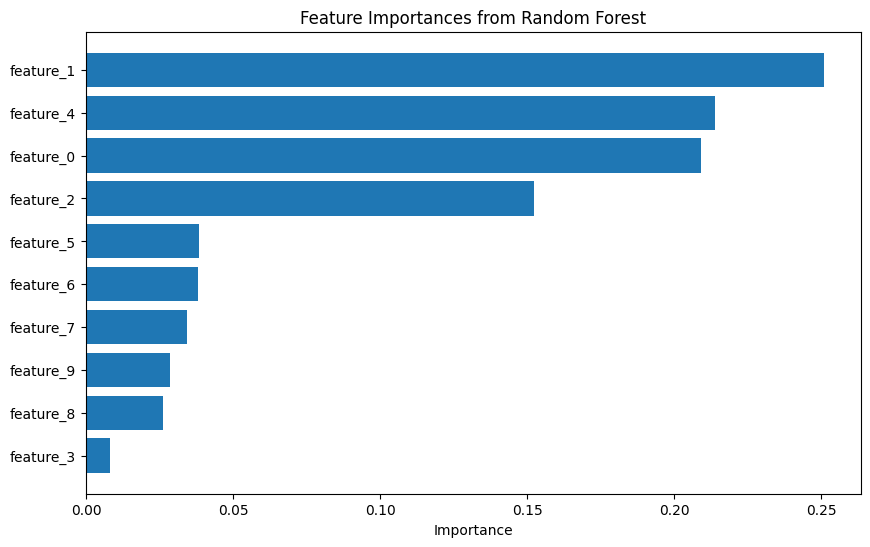

In [5]:
importances = clf.feature_importances_

# If X is a DataFrame, get feature names
feature_names = [f'feature_{i}' for i in range(X.shape[1])]

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()
